## 프로세스
* 웹 접속 및 HTML코드 추출 > 계층구조(DOM)변환 > 검색 후 추출 > 가공
* 아나콘다 사용자는 기본 라이브러리로 내장됨 (설치 불필요) 

In [ ]:
pip install bs4

In [3]:
# parser 가져오기

from bs4 import BeautifulSoup
import lxml

In [4]:
BeautifulSoup?

In [9]:
# lxml의 HTML파서

BeautifulSoup(html, 'lxml')

<html><body><div id="prices">
<table>
<tr class="bb">
<th class="bb lm lft">Date
            </th><th class="rgt bb">Open
            </th><th class="rgt bb">High
            </th><th class="rgt bb">Low
            </th><th class="rgt bb">Close
            </th><th class="rgt bb rm">Volume
        </th></tr><tr>
<td class="lm">Feb 28, 2014
            </td><td class="rgt">100.71
            </td><td class="rgt">100.71
            </td><td class="rgt">100.71
            </td><td class="rgt">100.71
            </td><td class="rgt rm">0
     </td></tr></table>
</div></body></html>

In [10]:
# 파이썬 표준 html파서

BeautifulSoup(html, 'html.parser')


<div id="prices">
<table>
<tr class="bb">
<th class="bb lm lft">Date
            <th class="rgt bb">Open
            <th class="rgt bb">High
            <th class="rgt bb">Low
            <th class="rgt bb">Close
            <th class="rgt bb rm">Volume
        <tr>
<td class="lm">Feb 28, 2014
            <td class="rgt">100.71
            <td class="rgt">100.71
            <td class="rgt">100.71
            <td class="rgt">100.71
            <td class="rgt rm">0
     </td></td></td></td></td></td></tr></th></th></th></th></th></th></tr></table>
</div>

In [18]:
# bs4 객체 속성과 매서드

html_file = open('market.html', encoding='utf-8')
html_src = html_file.read()
html_file.close()

In [16]:
html_src

'<html>\n    <body>\n        <h1> 과일 목록 </h1>\n        <div>\n                <p id=\'banana\' class=\'fruit\' title=\'바나나\'>\n                      <span class = \'price\'> 3000원 </span>\n                      <span class = \'count\'> 10개 </span>\n                      <span class = \'store\'> 바나나가게 </span>\n                      <a href = \'https://www.banana.com\'> banana.com </a>\n                </p>\n                <p id=\'cherry\' class=\'fruit\' title=\'체리\'>\n                    <span class = \'price\'> 100원 </span>\n                    <span class = \'count\'> 50개 </span>\n                    <span class = \'store\'> 체리가게</span>\n                    <a href = \'https://www.cherry.com\'> cherry.com </a>\n                </p>\n                <p id=\'orange\' class=\'fruit best\' title=\'오렌지\'>\n                    <span class = \'price\'> 500원 </span>\n                    <span class = \'count\'> 20개 </span>\n                    <span class = \'store\'> 오렌지가게</span>\n        

In [17]:
# print로 출력하면 트리구조롤 정렬된 결과값
print(html_src)

<html>
    <body>
        <h1> 과일 목록 </h1>
        <div>
                <p id='banana' class='fruit' title='바나나'>
                      <span class = 'price'> 3000원 </span>
                      <span class = 'count'> 10개 </span>
                      <span class = 'store'> 바나나가게 </span>
                      <a href = 'https://www.banana.com'> banana.com </a>
                </p>
                <p id='cherry' class='fruit' title='체리'>
                    <span class = 'price'> 100원 </span>
                    <span class = 'count'> 50개 </span>
                    <span class = 'store'> 체리가게</span>
                    <a href = 'https://www.cherry.com'> cherry.com </a>
                </p>
                <p id='orange' class='fruit best' title='오렌지'>
                    <span class = 'price'> 500원 </span>
                    <span class = 'count'> 20개 </span>
                    <span class = 'store'> 오렌지가게</span>
                    <a href = 'https://www.orange.com'> orange.com </

In [19]:
# DOM 구조로 변환 (구문분석)
soup = BeautifulSoup(html_src, 'lxml')

In [20]:
type(soup)

bs4.BeautifulSoup

In [22]:
# 한줄로 일목요연하게 정리된 결과값 (bs4의 힘!!)
soup

<html>
<body>
<h1> 과일 목록 </h1>
<div>
<p class="fruit" id="banana" title="바나나">
<span class="price"> 3000원 </span>
<span class="count"> 10개 </span>
<span class="store"> 바나나가게 </span>
<a href="https://www.banana.com"> banana.com </a>
</p>
<p class="fruit" id="cherry" title="체리">
<span class="price"> 100원 </span>
<span class="count"> 50개 </span>
<span class="store"> 체리가게</span>
<a href="https://www.cherry.com"> cherry.com </a>
</p>
<p class="fruit best" id="orange" title="오렌지">
<span class="price"> 500원 </span>
<span class="count"> 20개 </span>
<span class="store"> 오렌지가게</span>
<a href="https://www.orange.com"> orange.com </a>
<span>
<a href="https://www.orange.blog/">오렌지 효능</a>
</span>
</p>
</div>
</body>
</html>

## 매서드를 사용한 요소 탐색

1. find
* soup.find/find_all(태그, id=orange, class_= ‘fruit)
    * class는 예약어이기 때문에 class_으로 매개변수명을 구분함

* soup.find(name = "요소명") : 첫번째 요소 찾기
* soup.find(attrs = {"속성":"값"})
* soup.find(속성 = "값") # 키워드 가변 인수
* soup.find(string = "텍스트")
* soup.find(recursive = "True") # 기본값, 후손 요소 전체에서 검색
* soup.find(reculsive = "False") # 직계 자식 내에서만 검색
* soup.find_all() : 모든 요소 찾기
    * name, attrs, string, **kwargs, recursive, limit(final_all에서만 가능, limit=2는 2개만 찾기)

In [23]:
soup.find?

In [28]:
# 1개 태그 찾기
soup.find('p')

<p class="fruit" id="banana" title="바나나">
<span class="price"> 3000원 </span>
<span class="count"> 10개 </span>
<span class="store"> 바나나가게 </span>
<a href="https://www.banana.com"> banana.com </a>
</p>

In [25]:
type(soup.find('p'))

bs4.element.Tag

In [30]:
soup.find_all('p') # 해당하는 모든 태그값을 리스트로 반환

[<p class="fruit" id="banana" title="바나나">
 <span class="price"> 3000원 </span>
 <span class="count"> 10개 </span>
 <span class="store"> 바나나가게 </span>
 <a href="https://www.banana.com"> banana.com </a>
 </p>,
 <p class="fruit" id="cherry" title="체리">
 <span class="price"> 100원 </span>
 <span class="count"> 50개 </span>
 <span class="store"> 체리가게</span>
 <a href="https://www.cherry.com"> cherry.com </a>
 </p>,
 <p class="fruit best" id="orange" title="오렌지">
 <span class="price"> 500원 </span>
 <span class="count"> 20개 </span>
 <span class="store"> 오렌지가게</span>
 <a href="https://www.orange.com"> orange.com </a>
 <span>
 <a href="https://www.orange.blog/">오렌지 효능</a>
 </span>
 </p>]

In [32]:
soup.find('p', id='orange') # p태그에서 id가 orange인 요소 찾아줘

<p class="fruit best" id="orange" title="오렌지">
<span class="price"> 500원 </span>
<span class="count"> 20개 </span>
<span class="store"> 오렌지가게</span>
<a href="https://www.orange.com"> orange.com </a>
<span>
<a href="https://www.orange.blog/">오렌지 효능</a>
</span>
</p>

In [34]:
soup.find_all(class_='fruit') #클래스가 fruit인 모든 요소 찾아줘

[<p class="fruit" id="banana" title="바나나">
 <span class="price"> 3000원 </span>
 <span class="count"> 10개 </span>
 <span class="store"> 바나나가게 </span>
 <a href="https://www.banana.com"> banana.com </a>
 </p>,
 <p class="fruit" id="cherry" title="체리">
 <span class="price"> 100원 </span>
 <span class="count"> 50개 </span>
 <span class="store"> 체리가게</span>
 <a href="https://www.cherry.com"> cherry.com </a>
 </p>,
 <p class="fruit best" id="orange" title="오렌지">
 <span class="price"> 500원 </span>
 <span class="count"> 20개 </span>
 <span class="store"> 오렌지가게</span>
 <a href="https://www.orange.com"> orange.com </a>
 <span>
 <a href="https://www.orange.blog/">오렌지 효능</a>
 </span>
 </p>]

2. select
* find와 select의 차이, select는 css선택자 사용, 관계 연결 가능
* find와 select와 조건 방식이 다름
* find 와 select_one은 단일 태그값 만 반환
* find_all과 select는 모든 tag를 list로 반환
    * soup.select/select_one(태그, '#orange', '.fruit')
* soup.select() : 모든 요소 찾기 --> CSS 선택자 * soup.select_one() : 첫번째 요소 찾기

In [36]:
soup.select?

In [38]:
soup.select('p') # 모든 태그를 리스트로 반환

[<p class="fruit" id="banana" title="바나나">
 <span class="price"> 3000원 </span>
 <span class="count"> 10개 </span>
 <span class="store"> 바나나가게 </span>
 <a href="https://www.banana.com"> banana.com </a>
 </p>,
 <p class="fruit" id="cherry" title="체리">
 <span class="price"> 100원 </span>
 <span class="count"> 50개 </span>
 <span class="store"> 체리가게</span>
 <a href="https://www.cherry.com"> cherry.com </a>
 </p>,
 <p class="fruit best" id="orange" title="오렌지">
 <span class="price"> 500원 </span>
 <span class="count"> 20개 </span>
 <span class="store"> 오렌지가게</span>
 <a href="https://www.orange.com"> orange.com </a>
 <span>
 <a href="https://www.orange.blog/">오렌지 효능</a>
 </span>
 </p>]

In [39]:
soup.select_one('p') #단일 태그값만 반환(리스트X)

<p class="fruit" id="banana" title="바나나">
<span class="price"> 3000원 </span>
<span class="count"> 10개 </span>
<span class="store"> 바나나가게 </span>
<a href="https://www.banana.com"> banana.com </a>
</p>

In [44]:
# css셀렉터 문법 적용
'''id 속성'''
soup.select('#orange')

[<p class="fruit best" id="orange" title="오렌지">
 <span class="price"> 500원 </span>
 <span class="count"> 20개 </span>
 <span class="store"> 오렌지가게</span>
 <a href="https://www.orange.com"> orange.com </a>
 <span>
 <a href="https://www.orange.blog/">오렌지 효능</a>
 </span>
 </p>]

In [45]:
soup.select_one('#orange')

<p class="fruit best" id="orange" title="오렌지">
<span class="price"> 500원 </span>
<span class="count"> 20개 </span>
<span class="store"> 오렌지가게</span>
<a href="https://www.orange.com"> orange.com </a>
<span>
<a href="https://www.orange.blog/">오렌지 효능</a>
</span>
</p>

In [46]:
'''class 속성'''
soup.select('.price')

[<span class="price"> 3000원 </span>,
 <span class="price"> 100원 </span>,
 <span class="price"> 500원 </span>]

In [47]:
'''and관계'''
soup.select('p#orange')

[<p class="fruit best" id="orange" title="오렌지">
 <span class="price"> 500원 </span>
 <span class="count"> 20개 </span>
 <span class="store"> 오렌지가게</span>
 <a href="https://www.orange.com"> orange.com </a>
 <span>
 <a href="https://www.orange.blog/">오렌지 효능</a>
 </span>
 </p>]

In [48]:
'''or관계'''
soup.select('a, .store') # a태그 또는 스토어 클래스에 해당하는 요소 찾아줘

[<span class="store"> 바나나가게 </span>,
 <a href="https://www.banana.com"> banana.com </a>,
 <span class="store"> 체리가게</span>,
 <a href="https://www.cherry.com"> cherry.com </a>,
 <span class="store"> 오렌지가게</span>,
 <a href="https://www.orange.com"> orange.com </a>,
 <a href="https://www.orange.blog/">오렌지 효능</a>]

In [49]:
'''클래스 값이 2개인 태그'''
soup.select('.fruit.best')

[<p class="fruit best" id="orange" title="오렌지">
 <span class="price"> 500원 </span>
 <span class="count"> 20개 </span>
 <span class="store"> 오렌지가게</span>
 <a href="https://www.orange.com"> orange.com </a>
 <span>
 <a href="https://www.orange.blog/">오렌지 효능</a>
 </span>
 </p>]

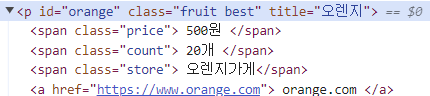

In [54]:
'''> 자식관계'''
soup.select('.fruit.best>a')

[<a href="https://www.orange.com"> orange.com </a>]

In [55]:
soup.select('.fruit.best > a')

[<a href="https://www.orange.com"> orange.com </a>]

In [69]:
'''(공백) 자손관계'''
soup.select('.fruit.best a') # 자식관계까지 같이 출력

[<a href="https://www.orange.com"> orange.com </a>,
 <a href="https://www.orange.blog/">오렌지 효능</a>]

In [70]:
soup.select('.fruit.best > span > a') #속성을 자식관계로 추가하면 자손관계만 출력됨

[<a href="https://www.orange.blog/">오렌지 효능</a>]

In [92]:
mylist = soup.select('fruit.best a')
type(mylist)

bs4.element.ResultSet

In [88]:
mylist = soup.select('.fruit.best a') #타입을 확인하고
type(mylist[0])

bs4.element.Tag

In [74]:
for tagitem in mylist:
    print(tagitem.text) #for문 돌리기

 orange.com 
오렌지 효능


In [75]:
print(tagitem)

<a href="https://www.orange.blog/">오렌지 효능</a>


In [76]:
for item in mylist:
    print(item['href']) # mylist(fruit best클래스의 a 태그) 중 href 속성을 찾아서 프린트 해줘

https://www.orange.com
https://www.orange.blog/


In [78]:
items = soup.select('.fruit')
print(items)

[<p class="fruit" id="banana" title="바나나">
<span class="price"> 3000원 </span>
<span class="count"> 10개 </span>
<span class="store"> 바나나가게 </span>
<a href="https://www.banana.com"> banana.com </a>
</p>, <p class="fruit" id="cherry" title="체리">
<span class="price"> 100원 </span>
<span class="count"> 50개 </span>
<span class="store"> 체리가게</span>
<a href="https://www.cherry.com"> cherry.com </a>
</p>, <p class="fruit best" id="orange" title="오렌지">
<span class="price"> 500원 </span>
<span class="count"> 20개 </span>
<span class="store"> 오렌지가게</span>
<a href="https://www.orange.com"> orange.com </a>
<span>
<a href="https://www.orange.blog/">오렌지 효능</a>
</span>
</p>]


In [86]:
for item in items:
    name = item['title']
    price = item.find('span', 'price')
    count= item.find('span', 'count')
    store = item.find('span', 'store')
    print(name, price, count, store)

바나나 <span class="price"> 3000원 </span> <span class="count"> 10개 </span> <span class="store"> 바나나가게 </span>
체리 <span class="price"> 100원 </span> <span class="count"> 50개 </span> <span class="store"> 체리가게</span>
오렌지 <span class="price"> 500원 </span> <span class="count"> 20개 </span> <span class="store"> 오렌지가게</span>


In [81]:
for item in items:
    name = item.select('.price')
    print(name)

[<span class="price"> 3000원 </span>]
[<span class="price"> 100원 </span>]
[<span class="price"> 500원 </span>]


## 요소의 속성 및 텍스트 반환
* e.name : 요소의 이름 얻기
* e['속성명'] : 요소의 속성 얻기
* e.attrs : 요소의 속성 목록(dict)
* e.string : 요소의 텍스트
* e.strings : 자식과 후손 요소 텍스트 목록(iter)
* e.text : 자식과 후손 요소의 텍스트를 문자열로 얻기

In [93]:
soup.find('p', id='orange')

<p class="fruit best" id="orange" title="오렌지">
<span class="price"> 500원 </span>
<span class="count"> 20개 </span>
<span class="store"> 오렌지가게</span>
<a href="https://www.orange.com"> orange.com </a>
<span>
<a href="https://www.orange.blog/">오렌지 효능</a>
</span>
</p>

In [94]:
e = soup.find('p', id='orange')

In [95]:
type(e)

bs4.element.Tag

In [96]:
#요소의 이름 얻기
e.name

'p'

In [97]:
#요소의 속성목록을 딕셔너리로 반환
e.attrs

{'id': 'orange', 'class': ['fruit', 'best'], 'title': '오렌지'}

In [98]:
#요소의 특정 속성 값 얻기
e['title']

'오렌지'

In [101]:
요소의 텍스트
e.string

In [102]:
print(e.string)

None


In [103]:
# 자식과 후손 요소의 텍스트를 문자열로 반환
e.strings

<generator object Tag._all_strings at 0x000001B01226B440>

In [104]:
for items in e.strings:
    print(items)



 500원 


 20개 


 오렌지가게


 orange.com 




오렌지 효능






## 트리구조를 활용한 요소탐색

In [105]:
# 부모요소
e.parent

<div>
<p class="fruit" id="banana" title="바나나">
<span class="price"> 3000원 </span>
<span class="count"> 10개 </span>
<span class="store"> 바나나가게 </span>
<a href="https://www.banana.com"> banana.com </a>
</p>
<p class="fruit" id="cherry" title="체리">
<span class="price"> 100원 </span>
<span class="count"> 50개 </span>
<span class="store"> 체리가게</span>
<a href="https://www.cherry.com"> cherry.com </a>
</p>
<p class="fruit best" id="orange" title="오렌지">
<span class="price"> 500원 </span>
<span class="count"> 20개 </span>
<span class="store"> 오렌지가게</span>
<a href="https://www.orange.com"> orange.com </a>
<span>
<a href="https://www.orange.blog/">오렌지 효능</a>
</span>
</p>
</div>

In [107]:
# 모든 조상요소
e.parents
for items in e.parents:
    print(items)

<div>
<p class="fruit" id="banana" title="바나나">
<span class="price"> 3000원 </span>
<span class="count"> 10개 </span>
<span class="store"> 바나나가게 </span>
<a href="https://www.banana.com"> banana.com </a>
</p>
<p class="fruit" id="cherry" title="체리">
<span class="price"> 100원 </span>
<span class="count"> 50개 </span>
<span class="store"> 체리가게</span>
<a href="https://www.cherry.com"> cherry.com </a>
</p>
<p class="fruit best" id="orange" title="오렌지">
<span class="price"> 500원 </span>
<span class="count"> 20개 </span>
<span class="store"> 오렌지가게</span>
<a href="https://www.orange.com"> orange.com </a>
<span>
<a href="https://www.orange.blog/">오렌지 효능</a>
</span>
</p>
</div>
<body>
<h1> 과일 목록 </h1>
<div>
<p class="fruit" id="banana" title="바나나">
<span class="price"> 3000원 </span>
<span class="count"> 10개 </span>
<span class="store"> 바나나가게 </span>
<a href="https://www.banana.com"> banana.com </a>
</p>
<p class="fruit" id="cherry" title="체리">
<span class="price"> 100원 </span>
<span class="count"> 5

In [108]:
# 모든 자손요소 리스트
e.contents

['\n',
 <span class="price"> 500원 </span>,
 '\n',
 <span class="count"> 20개 </span>,
 '\n',
 <span class="store"> 오렌지가게</span>,
 '\n',
 <a href="https://www.orange.com"> orange.com </a>,
 '\n',
 <span>
 <a href="https://www.orange.blog/">오렌지 효능</a>
 </span>,
 '\n']

In [110]:
# 모든 자식요소 eter
e.children
for item in e.children:
    print(item.name)

None
span
None
span
None
span
None
a
None
span
None
